### Testing decomposition rules

In [1]:
from openqaoa.qaoa_parameters import *
from openqaoa.qaoa_parameters import create_qaoa_variational_params

In [2]:
from openqaoa.qaoa_parameters.baseparams import QAOACircuitParams
from openqaoa.devices import DeviceQiskit, DevicePyquil, create_device
from openqaoa.backends.qaoa_backend import *
from openqaoa.backends.simulators.qaoa_pyquil_sim import QAOAPyQuilWavefunctionSimulatorBackend
from openqaoa.backends.qpus.qaoa_pyquil_qpu import QAOAPyQuilQPUBackend
from openqaoa.backends.simulators.qaoa_qiskit_sim import QAOAQiskitBackendStatevecSimulator
from openqaoa.optimizers import get_optimizer
from openqaoa.utilities import *

In [3]:
from pyquil import Program, gates
from pyquil.api import WavefunctionSimulator
from pyquil.quilatom import Parameter

In [4]:
cost_hamil = Hamiltonian([PauliOp('ZZ', (0, 1)), PauliOp('ZZ', (1, 2)), PauliOp('ZZ', (0, 2)),
                          PauliOp('Z',(2,)),PauliOp('Z',(3,))], 
                         [1, 1, 1, 2, 2], 0)

In [5]:
cost_hamil.expression

0 + 1Z_{0}Z_{1} + 1Z_{0}Z_{2} + 1Z_{1}Z_{2} + 2Z_{2} + 2Z_{3}

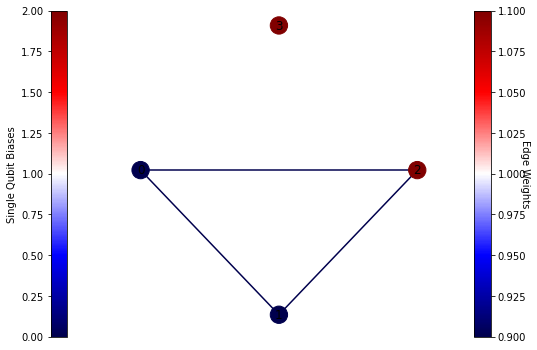

In [6]:
plot_graph(graph_from_hamiltonian(cost_hamil))

In [7]:
mixer_hamil = X_mixer_hamiltonian(n_qubits=4)
mixer_hamil.expression

-1X_{0} - 1X_{1} - 1X_{2} - 1X_{3} + 0

In [8]:
circuit_params = QAOACircuitParams(cost_hamil, mixer_hamil, p=2)

In [9]:
variate_params = create_qaoa_variational_params(circuit_params,'standard','ramp')

In [10]:
variate_params

Standard Parameterisation:
	p: 2
Variational Parameters:
	betas: [0.525 0.175]
	gammas: [0.175 0.525]

#### pyquil QPU

In [11]:
device_pyquil = DevicePyquil(device_name = "Aspen-11", as_qvm=True, execution_timeout = 500)
backend_pyquil_qpu = get_qaoa_backend(circuit_params,device_pyquil,n_shots=1000)

In [12]:
print(backend_pyquil_qpu.parametric_circuit)

DECLARE ro BIT[4]
H 0
H 1
H 2
H 3
DECLARE pauli2qcost00 REAL[1]
RZ(pauli2qcost00) 0
RZ(pauli2qcost00) 1
CPHASE(-2*pauli2qcost00) 0 1
DECLARE pauli2qcost01 REAL[1]
RZ(pauli2qcost01) 1
RZ(pauli2qcost01) 2
CPHASE(-2*pauli2qcost01) 1 2
DECLARE pauli2qcost02 REAL[1]
RZ(pauli2qcost02) 0
RZ(pauli2qcost02) 2
CPHASE(-2*pauli2qcost02) 0 2
DECLARE pauli1qcost00 REAL[1]
RZ(pauli1qcost00) 2
DECLARE pauli1qcost01 REAL[1]
RZ(pauli1qcost01) 3
DECLARE pauli1qmixer00 REAL[1]
RX(pauli1qmixer00) 0
DECLARE pauli1qmixer01 REAL[1]
RX(pauli1qmixer01) 1
DECLARE pauli1qmixer02 REAL[1]
RX(pauli1qmixer02) 2
DECLARE pauli1qmixer03 REAL[1]
RX(pauli1qmixer03) 3
DECLARE pauli2qcost10 REAL[1]
RZ(pauli2qcost10) 0
RZ(pauli2qcost10) 1
CPHASE(-2*pauli2qcost10) 0 1
DECLARE pauli2qcost11 REAL[1]
RZ(pauli2qcost11) 1
RZ(pauli2qcost11) 2
CPHASE(-2*pauli2qcost11) 1 2
DECLARE pauli2qcost12 REAL[1]
RZ(pauli2qcost12) 0
RZ(pauli2qcost12) 2
CPHASE(-2*pauli2qcost12) 0 2
DECLARE pauli1qcost10 REAL[1]
RZ(pauli1qcost10) 2
DECLARE pauli1

In [13]:
print(backend_pyquil_qpu.qaoa_circuit(variate_params))

DECLARE ro BIT[4]
DECLARE pauli2qcost00 REAL[1]
DECLARE pauli2qcost01 REAL[1]
DECLARE pauli2qcost02 REAL[1]
DECLARE pauli1qcost00 REAL[1]
DECLARE pauli1qcost01 REAL[1]
DECLARE pauli1qmixer00 REAL[1]
DECLARE pauli1qmixer01 REAL[1]
DECLARE pauli1qmixer02 REAL[1]
DECLARE pauli1qmixer03 REAL[1]
DECLARE pauli2qcost10 REAL[1]
DECLARE pauli2qcost11 REAL[1]
DECLARE pauli2qcost12 REAL[1]
DECLARE pauli1qcost10 REAL[1]
DECLARE pauli1qcost11 REAL[1]
DECLARE pauli1qmixer10 REAL[1]
DECLARE pauli1qmixer11 REAL[1]
DECLARE pauli1qmixer12 REAL[1]
DECLARE pauli1qmixer13 REAL[1]
RZ(pi) 42
RX(pi/2) 42
RZ(pi/2) 42
RX(-pi/2) 42
RZ(pi/2 + 1.0*pauli1qcost01[0]) 42
RX(pi/2) 42
RZ(1.0*pauli1qmixer03[0]) 42
RX(-pi/2) 42
RZ(1.0*pauli1qcost11[0]) 42
RX(pi/2) 42
RZ(1.0*pauli1qmixer13[0]) 42
RX(-pi/2) 42
RZ(-pi/2) 42
MEASURE 42 ro[3]
RZ(pi) 31
RX(pi/2) 31
RZ(pi/2) 31
RX(-pi/2) 31
RZ(1.0*pauli2qcost00[0]) 31
RZ(pi) 46
RX(pi/2) 46
RZ(pi/2) 46
RX(-pi/2) 46
RZ(1.0*pauli2qcost00[0]) 46
CPHASE(-2.0*pauli2qcost00[0]) 31 46


In [14]:
backend_pyquil_qpu.expectation(variate_params)

-3.4520000000000004

In [15]:
backend_pyquil_qpu.exact_solution

(-5.0, [array([0, 0, 1, 1]), array([1, 0, 1, 1]), array([0, 1, 1, 1])])

#### pyquil wavefunction simulator #TODO

In [17]:
# backend_pyquil_statevec = get_qaoa_backend(circuit_params, 'pyquil_statevec_simulator')

In [18]:
# # statevector = backend_pyquil_statevec.wavefunction(variate_params)
# # print(statevector)
# backend_pyquil_statevec.expectation(variate_params)

#### qiskit wavefunction simulator

In [16]:
qiskit_sim = create_device('local','qiskit.statevector_simulator')

In [17]:
backend_qiskit_statevec = get_qaoa_backend(circuit_params,qiskit_sim)

In [18]:
backend_qiskit_statevec.parametric_circuit.draw()

┌───┐                                                         »
q0_0: ┤ H ├─■───────────────────────────────────────────────────────»
      ├───┤ │ZZ(['2q', 'cost', 0, 0])                               »
q0_1: ┤ H ├─■────────────────────────────■──────────────────────────»
      ├───┤                              │ZZ(['2q', 'cost', 0, 1])  »
q0_2: ┤ H ├──────────────────────────────■──────────────────────────»
      ├───┤┌──────────────────────────┐┌───────────────────────────┐»
q0_3: ┤ H ├┤ Rz(['1q', 'cost', 0, 1]) ├┤ Rx(['1q', 'mixer', 0, 3]) ├»
      └───┘└──────────────────────────┘└───────────────────────────┘»
«                                  ┌───────────────────────────┐»
«q0_0: ─■──────────────────────────┤ Rx(['1q', 'mixer', 0, 0]) ├»
«       │                          ├───────────────────────────┤»
«q0_1: ─┼──────────────────────────┤ Rx(['1q', 'mixer', 0, 1]) ├»
«       │ZZ(['2q', 'cost', 0, 2])  └┬──────────────────────────┤»
«q0_2: ─■───────────────────────────┤ Rz(['1q', 'cost', 0, 0]) ├»
«      ┌──────────────────────────┐┌┴──────────────────────────┤»
«q0_3: ┤ Rz(['1q', 'cost', 1, 1]) ├┤ Rx(['1q', 'mixer', 1, 3]) ├»
«      └──────────────────────────┘└───────────────────────────┘»
«                                                              »
«q0_0: ──■─────────────────────────────────────────────────────»
«        │ZZ(['2q', 'cost', 1, 0])                             »
«q0_1: ──■───────────────────────────■─────────────────────────»
«      ┌───────────────────────────┐ │ZZ(['2q', 'cost', 1, 1]) »
«q0_2: ┤ Rx(['1q', 'mixer', 0, 2]) ├─■─────────────────────────»
«      └───────────────────────────┘                           »
«q0_3: ────────────────────────────────────────────────────────»
«                                                              »
«                                 ┌───────────────────────────┐»
«q0_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 0]) ├»
«       │                         ├───────────────────────────┤»
«q0_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 1, 1]) ├»
«       │ZZ(['2q', 'cost', 1, 2]) └┬──────────────────────────┤»
«q0_2: ─■──────────────────────────┤ Rz(['1q', 'cost', 1, 0]) ├»
«                                  └──────────────────────────┘»
«q0_3: ────────────────────────────────────────────────────────»
«                                                              »
«                                   
«q0_0: ─────────────────────────────
«                                   
«q0_1: ─────────────────────────────
«      ┌───────────────────────────┐
«q0_2: ┤ Rx(['1q', 'mixer', 1, 2]) ├
«      └───────────────────────────┘
«q0_3: ─────────────────────────────
«

In [19]:
backend_qiskit_statevec.qaoa_circuit(variate_params).draw()

┌───┐                                   ┌───────────┐             »
q0_0: ┤ H ├─■───────────────────────■─────────┤ Rx(-1.05) ├──■──────────»
      ├───┤ │ZZ(0.35)               │         ├───────────┤  │ZZ(1.05)  »
q0_1: ┤ H ├─■───────────■───────────┼─────────┤ Rx(-1.05) ├──■──────────»
      ├───┤             │ZZ(0.35)   │ZZ(0.35) └┬─────────┬┘┌───────────┐»
q0_2: ┤ H ├─────────────■───────────■──────────┤ Rz(0.7) ├─┤ Rx(-1.05) ├»
      ├───┤┌─────────┐┌───────────┐┌─────────┐┌┴─────────┴┐└───────────┘»
q0_3: ┤ H ├┤ Rz(0.7) ├┤ Rx(-1.05) ├┤ Rz(2.1) ├┤ Rx(-0.35) ├─────────────»
      └───┘└─────────┘└───────────┘└─────────┘└───────────┘             »
«                            ┌───────────┐             
«q0_0: ────────────■─────────┤ Rx(-0.35) ├─────────────
«                  │         ├───────────┤             
«q0_1: ─■──────────┼─────────┤ Rx(-0.35) ├─────────────
«       │ZZ(1.05)  │ZZ(1.05) └┬─────────┬┘┌───────────┐
«q0_2: ─■──────────■──────────┤ Rz(2.1) ├─┤ Rx(-0.35) ├
«                             └─────────┘ └───────────┘
«q0_3: ────────────────────────────────────────────────
«

In [20]:
print(backend_qiskit_statevec.expectation(variate_params))
print(backend_qiskit_statevec.expectation_w_uncertainty(variate_params))

-3.433133222123362
(-3.433133222123362, 2.31185193953547)


#### qiskit noisy shot based simulator

In [22]:
# from qiskit.providers.aer.noise import NoiseModel
# from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider('ibm-q-startup','entropica-labs','reservations')
# backend = provider.get_backend('ibmq_guadalupe')
# noise_model = NoiseModel.from_backend(backend)

In [24]:
# qiskit_shot_sim = create_device('local','qiskit.shot_simulator')
# backend_qiskit_shot = get_qaoa_backend(circuit_params, qiskit_shot_sim, n_shots=1000000, noise_model=noise_model)

In [26]:
# print(backend_qiskit_shot.expectation(variate_params))
# print(backend_qiskit_shot.expectation_w_uncertainty(variate_params))

-3.167164
(-3.163736, 2.5150440398338954)


In [29]:
# current_ckt = backend_qiskit_shot.qaoa_circuit(variate_params)

In [31]:
# backend_qiskit_shot.parametric_circuit.draw()

┌───┐                                                         »
  q1_0: ┤ H ├─■───────────────────────────────────────────────────────»
        ├───┤ │ZZ(['2q', 'cost', 0, 0])                               »
  q1_1: ┤ H ├─■────────────────────────────■──────────────────────────»
        ├───┤                              │ZZ(['2q', 'cost', 0, 1])  »
  q1_2: ┤ H ├──────────────────────────────■──────────────────────────»
        ├───┤┌──────────────────────────┐┌───────────────────────────┐»
  q1_3: ┤ H ├┤ Rz(['1q', 'cost', 0, 1]) ├┤ Rx(['1q', 'mixer', 0, 3]) ├»
        └───┘└──────────────────────────┘└───────────────────────────┘»
meas: 4/══════════════════════════════════════════════════════════════»
                                                                      »
«                                    ┌───────────────────────────┐»
«  q1_0: ─■──────────────────────────┤ Rx(['1q', 'mixer', 0, 0]) ├»
«         │                          ├───────────────────────────┤»
«  q1_1: ─┼──────────────────────────┤ Rx(['1q', 'mixer', 0, 1]) ├»
«         │ZZ(['2q', 'cost', 0, 2])  └┬──────────────────────────┤»
«  q1_2: ─■───────────────────────────┤ Rz(['1q', 'cost', 0, 0]) ├»
«        ┌──────────────────────────┐┌┴──────────────────────────┤»
«  q1_3: ┤ Rz(['1q', 'cost', 1, 1]) ├┤ Rx(['1q', 'mixer', 1, 3]) ├»
«        └──────────────────────────┘└───────────────────────────┘»
«meas: 4/═════════════════════════════════════════════════════════»
«                                                                 »
«                                                                »
«  q1_0: ──■─────────────────────────────────────────────────────»
«          │ZZ(['2q', 'cost', 1, 0])                             »
«  q1_1: ──■───────────────────────────■─────────────────────────»
«        ┌───────────────────────────┐ │ZZ(['2q', 'cost', 1, 1]) »
«  q1_2: ┤ Rx(['1q', 'mixer', 0, 2]) ├─■─────────────────────────»
«        └───────────────────────────┘                           »
«  q1_3: ────────────────────────────────────────────────────────»
«                                                                »
«meas: 4/════════════════════════════════════════════════════════»
«                                                                »
«                                   ┌───────────────────────────┐»
«  q1_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 0]) ├»
«         │                         ├───────────────────────────┤»
«  q1_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 1, 1]) ├»
«         │ZZ(['2q', 'cost', 1, 2]) └┬──────────────────────────┤»
«  q1_2: ─■──────────────────────────┤ Rz(['1q', 'cost', 1, 0]) ├»
«                                    └──────────────────────────┘»
«  q1_3: ────────────────────────────────────────────────────────»
«                                                                »
«meas: 4/════════════════════════════════════════════════════════»
«                                                                »
«                                      ░ ┌─┐         
«  q1_0: ──────────────────────────────░─┤M├─────────
«                                      ░ └╥┘┌─┐      
«  q1_1: ──────────────────────────────░──╫─┤M├──────
«        ┌───────────────────────────┐ ░  ║ └╥┘┌─┐   
«  q1_2: ┤ Rx(['1q', 'mixer', 1, 2]) ├─░──╫──╫─┤M├───
«        └───────────────────────────┘ ░  ║  ║ └╥┘┌─┐
«  q1_3: ──────────────────────────────░──╫──╫──╫─┤M├
«                                      ░  ║  ║  ║ └╥┘
«meas: 4/═════════════════════════════════╩══╩══╩══╩═
«                                         0  1  2  3